**Semester Long Project Deliverable #2 – The Check-In**

In [12]:
import pandas as pd


from google.colab import drive


drive.mount('/content/drive', force_remount=True)

data = pd.read_csv('/content/drive/My Drive/user_behavior_dataset.csv')

data.head()

Mounted at /content/drive


,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


##Insights - 1

<ipython-input-7-e0c44601d6d7>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='User Behavior Class', y='App Usage Time', data=avg_usage, palette='viridis')


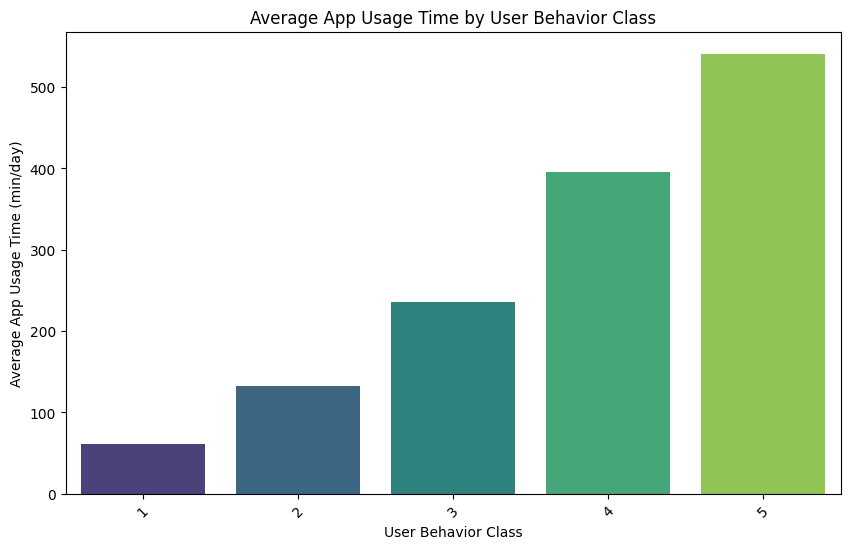

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


avg_usage = data.groupby('User Behavior Class')['App Usage Time'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='User Behavior Class', y='App Usage Time', data=avg_usage, palette='viridis')
plt.title('Average App Usage Time by User Behavior Class')
plt.xlabel('User Behavior Class')
plt.ylabel('Average App Usage Time (min/day)')
plt.xticks(rotation=45)
plt.show()


##R version

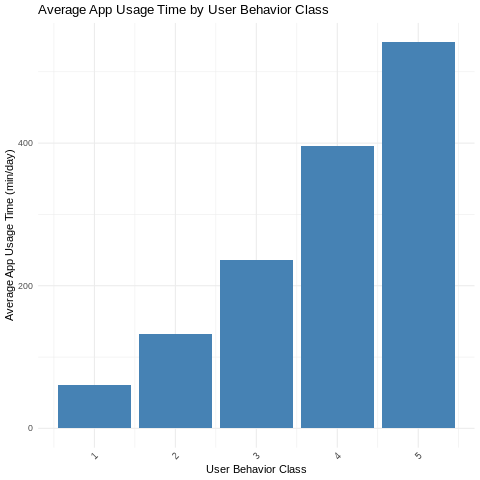

In [21]:
%%R
library(ggplot2)
library(dplyr)

avg_usage <- data %>%
  group_by(User.Behavior.Class) %>%
  summarize(Average_App_Usage_Time = mean(App.Usage.Time..min.day., na.rm = TRUE))

ggplot(avg_usage, aes(x = User.Behavior.Class, y = Average_App_Usage_Time)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  labs(title = "Average App Usage Time by User Behavior Class",
       x = "User Behavior Class",
       y = "Average App Usage Time (min/day)") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


##Insights - 2

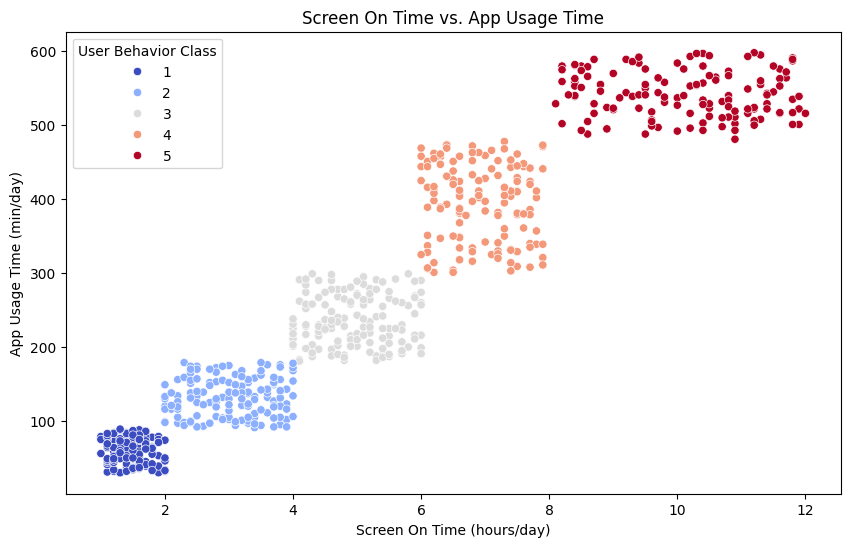

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Screen On Time', y='App Usage Time', data=data, hue='User Behavior Class', palette='coolwarm')
plt.title('Screen On Time vs. App Usage Time')
plt.xlabel('Screen On Time (hours/day)')
plt.ylabel('App Usage Time (min/day)')
plt.legend(title='User Behavior Class')
plt.show()


##Insights - 3

Index(['User ID', 'App Usage Time', 'Screen On Time', 'Battery Drain',
       'Number of Apps Installed', 'Data Usage', 'Age', 'User Behavior Class',
       'Device Model_OnePlus 9', 'Device Model_Samsung Galaxy S21',
       'Device Model_Xiaomi Mi 11', 'Device Model_iPhone 12',
       'Operating System_iOS', 'Gender_Male', 'Gender'],
      dtype='object')


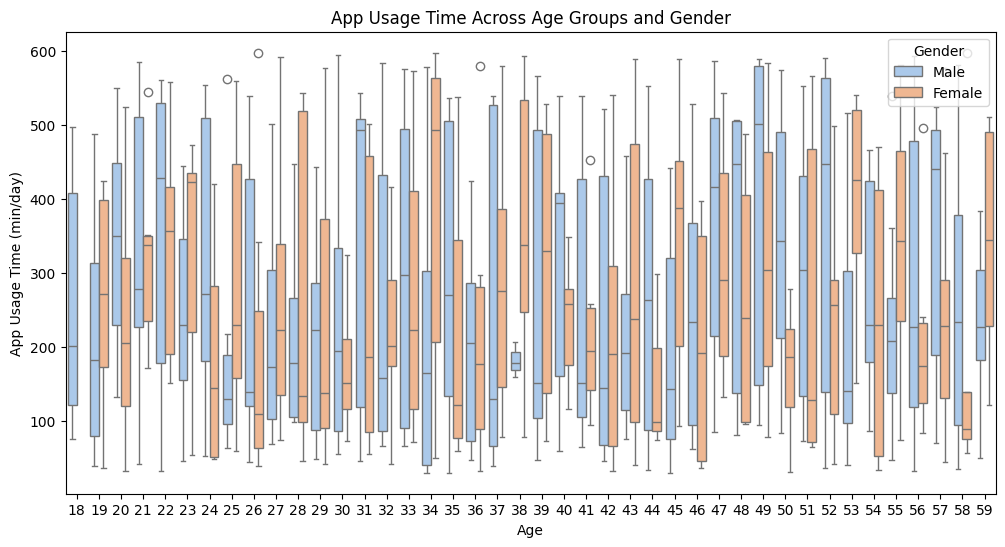

In [ ]:

if 'Gender_Male' in data.columns:
    data['Gender'] = data['Gender_Male'].apply(lambda x: 'Male' if x == 1 else 'Female')


print(data.columns)

plt.figure(figsize=(12, 6))
sns.boxplot(x='Age', y='App Usage Time', hue='Gender', data=data, palette='pastel')
plt.title('App Usage Time Across Age Groups and Gender')
plt.xlabel('Age')
plt.ylabel('App Usage Time (min/day)')
plt.legend(title='Gender')
plt.show()


##Insights - 4

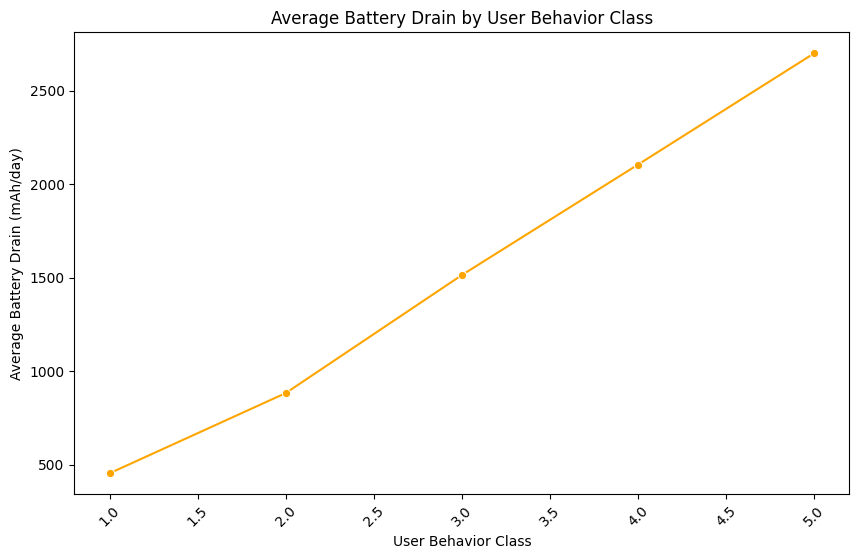

In [ ]:
avg_battery_drain = data.groupby('User Behavior Class')['Battery Drain'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='User Behavior Class', y='Battery Drain', data=avg_battery_drain, marker='o', color='orange')
plt.title('Average Battery Drain by User Behavior Class')
plt.xlabel('User Behavior Class')
plt.ylabel('Average Battery Drain (mAh/day)')
plt.xticks(rotation=45)
plt.show()


## More Data (Future Use)

Mounted at /content/drive
   User ID    Device Model Operating System  App Usage Time (min/day)  \
0        1  Google Pixel 5          Android                       393   
1        2       OnePlus 9          Android                       268   
2        3    Xiaomi Mi 11          Android                       154   
3        4  Google Pixel 5          Android                       239   
4        5       iPhone 12              iOS                       187   

   Screen On Time (hours/day)  Battery Drain (mAh/day)  \
0                         6.4                     1872   
1                         4.7                     1331   
2                         4.0                      761   
3                         4.8                     1676   
4                         4.3                     1367   

   Number of Apps Installed  Data Usage (MB/day)  Age  Gender  \
0                        67                 1122   40    Male   
1                        42                  944   47  F

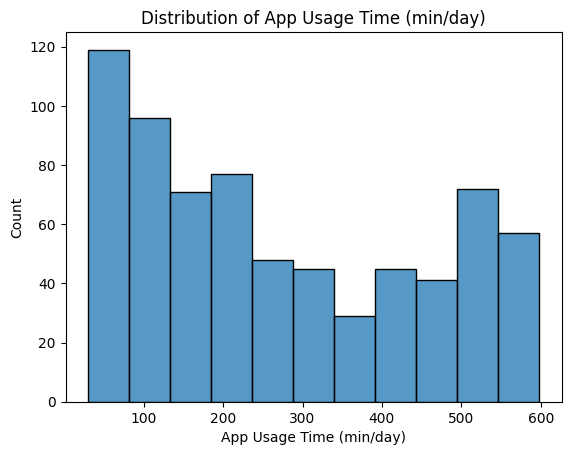

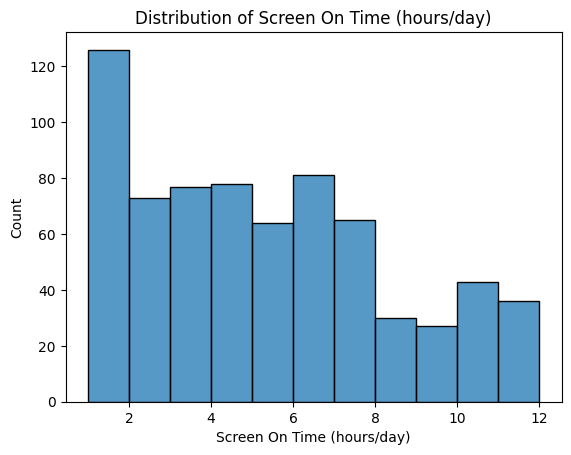

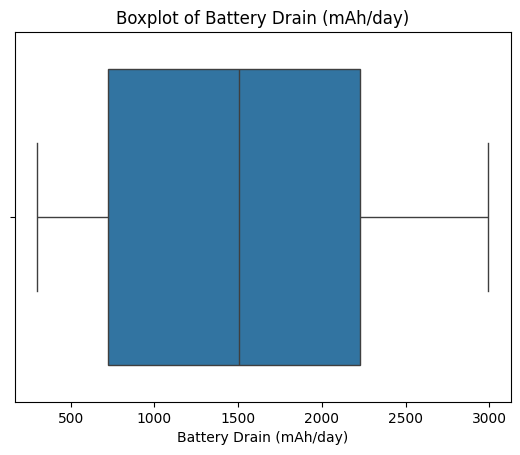

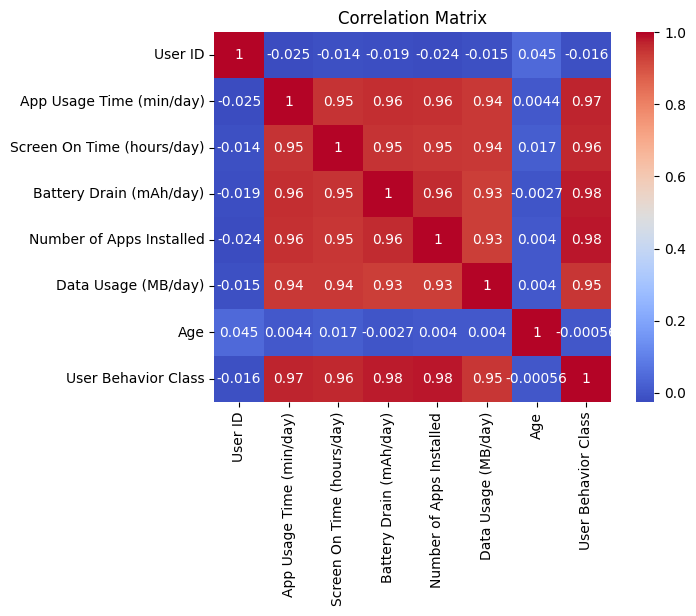

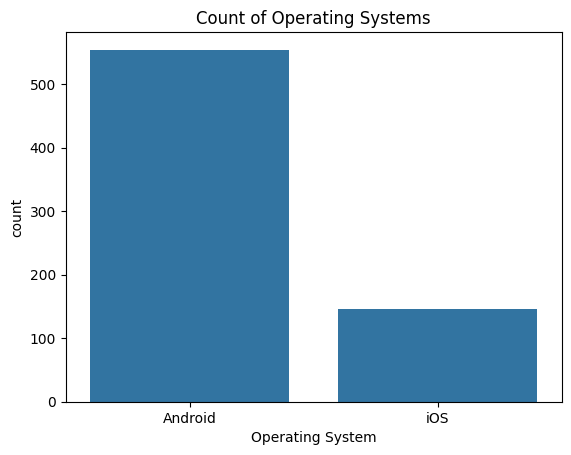

T-statistic: 39.68877459278398, P-value: 2.47028955582671e-231
Model Accuracy: 1.0


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


from google.colab import drive
drive.mount('/content/drive', force_remount=True)


data = pd.read_csv('/content/drive/My Drive/user_behavior_dataset.csv')

print(data.head())


print(data.info())


print(data.describe())


print(data.isnull().sum())


data = data.drop_duplicates()


sns.histplot(data['App Usage Time (min/day)'])
plt.title('Distribution of App Usage Time (min/day)')
plt.show()

sns.histplot(data['Screen On Time (hours/day)'])
plt.title('Distribution of Screen On Time (hours/day)')
plt.show()


sns.boxplot(x='Battery Drain (mAh/day)', data=data)
plt.title('Boxplot of Battery Drain (mAh/day)')
plt.show()

numeric_data = data.select_dtypes(include=[float, int])


corr_matrix = numeric_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


sns.countplot(x='Operating System', data=data)
plt.title('Count of Operating Systems')
plt.show()


t_stat, p_val = stats.ttest_ind(data['App Usage Time (min/day)'], data['Screen On Time (hours/day)'])
print(f"T-statistic: {t_stat}, P-value: {p_val}")

X = data.drop('User Behavior Class', axis=1)
y = data['User Behavior Class']


X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)


accuracy = model.score(X_test, y_test)
print(f"Model Accuracy: {accuracy}")




Mounted at /content/drive
Initial Data:
   User ID    Device Model Operating System  App Usage Time (min/day)  \
0        1  Google Pixel 5          Android                       393   
1        2       OnePlus 9          Android                       268   
2        3    Xiaomi Mi 11          Android                       154   
3        4  Google Pixel 5          Android                       239   
4        5       iPhone 12              iOS                       187   

   Screen On Time (hours/day)  Battery Drain (mAh/day)  \
0                         6.4                     1872   
1                         4.7                     1331   
2                         4.0                      761   
3                         4.8                     1676   
4                         4.3                     1367   

   Number of Apps Installed  Data Usage (MB/day)  Age  Gender  \
0                        67                 1122   40    Male   
1                        42               

<ipython-input-19-05b4413cc781>:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)


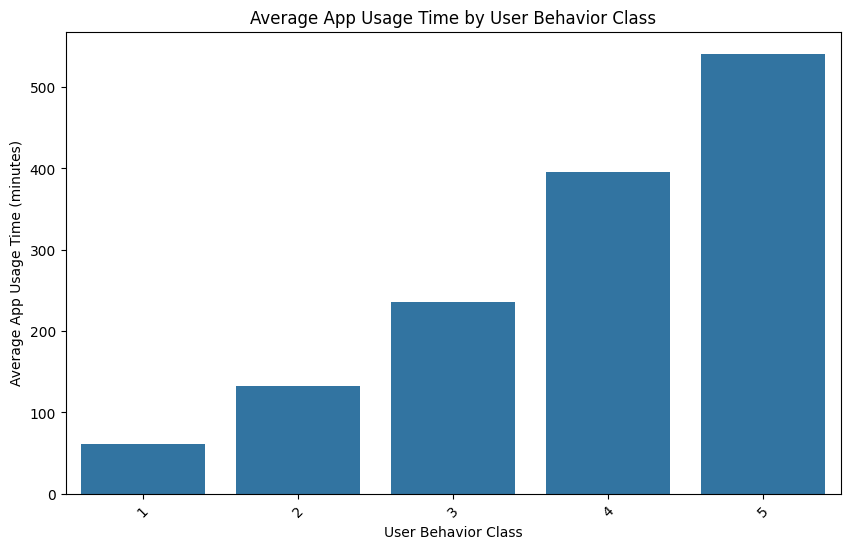

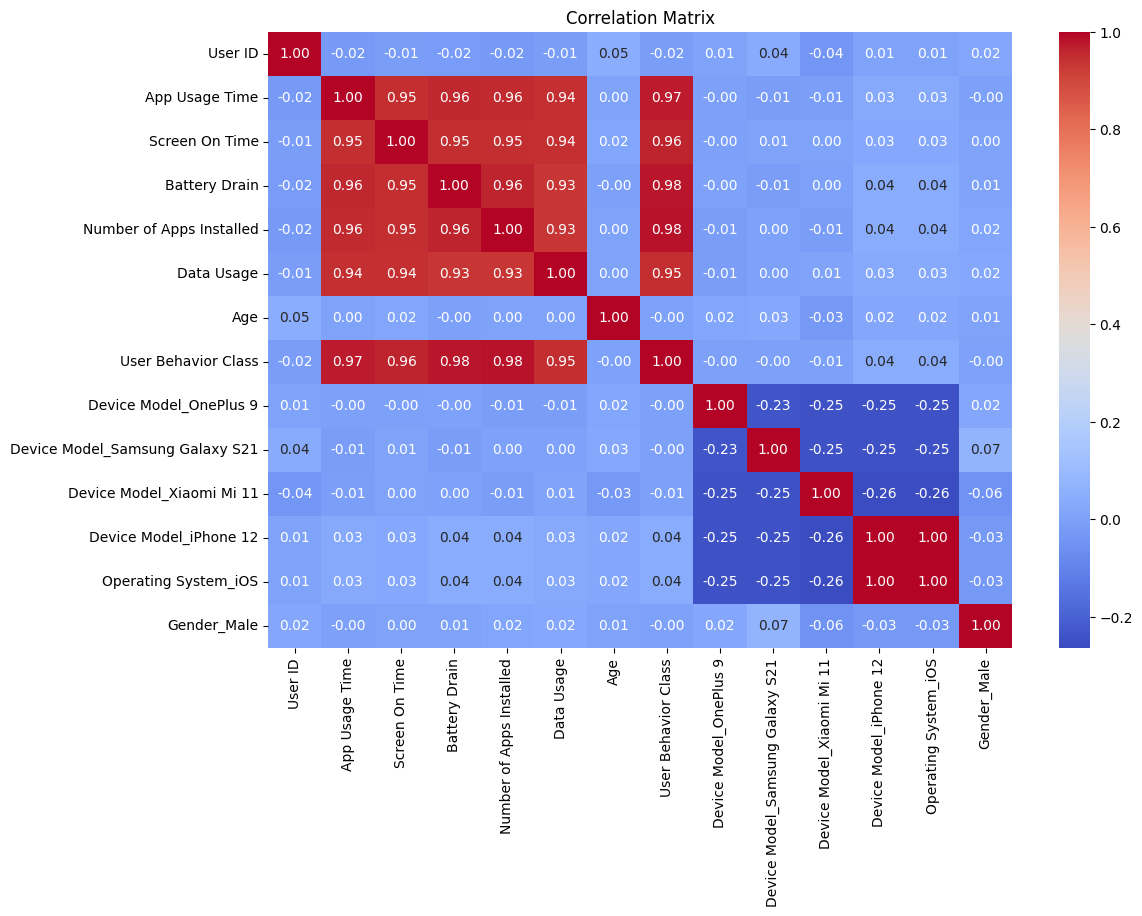


Cleaned dataset saved successfully.


In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive


drive.mount('/content/drive', force_remount=True)


data = pd.read_csv('/content/drive/My Drive/user_behavior_dataset.csv')

print("Initial Data:")
print(data.head())
print("\nColumn Names:")
print(data.columns)

data.columns = data.columns.str.strip().str.replace(" (min/day)", "").str.replace(" (hours/day)", "").str.replace(" (mAh/day)", "").str.replace(" (MB/day)", "")


print("\nUpdated Column Names:")
print(data.columns)


print("\nMissing Values:")
print(data.isnull().sum())

data['Age'].fillna(data['Age'].median(), inplace=True)

data = data[data['App Usage Time'] >= 0]
data = data[data['Screen On Time'] >= 0]
data = data[data['Battery Drain'] >= 0]

data = pd.get_dummies(data, columns=['Device Model', 'Operating System', 'Gender'], drop_first=True)

avg_usage = data.groupby('User Behavior Class')['App Usage Time'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='User Behavior Class', y='App Usage Time', data=avg_usage)
plt.title('Average App Usage Time by User Behavior Class')
plt.xlabel('User Behavior Class')
plt.ylabel('Average App Usage Time (minutes)')
plt.xticks(rotation=45)
plt.show()

correlation_matrix = data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

data.to_csv('/content/drive/My Drive/cleaned_user_behavior_dataset.csv', index=False)

print("\nCleaned dataset saved successfully.")
